# What is probability? A simulated introduction

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Learning Objectives of Part 1

- To have an understanding of what "probability" means, in both Bayesian and Frequentist terms;
- To be able to simulate probability distributions that model real-world phenomena;
- To understand and be able to simulate joint probabilities and conditional probabilities;
- To understand Bayes' Theorem and its utility.

## 1. Probability

> To the pioneers such as Bernoulli, Bayes and Laplace, a probability represented a _degree-of-belief_ or plausibility; how much they thought that something was true, based on the evidence at hand. To the 19th century scholars, however, this seemed too vague and subjective an idea to be the basis of a rigorous mathematical theory. So they redefined probability as the _long-run relative frequency_ with which an event occurred, given (infinitely) many repeated (experimental) trials. Since frequencies can be measured, probability was now seen as an objective tool for dealing with _random_ phenomena.

-- _Data Analysis, A Bayesian Tutorial_, Sivia & Skilling (p. 9)

What type of random phenomena are we talking about here? One example is:

- Knowing that a website has a click-through rate (CTR) of 10%, we can calculate the probabilty of having 10 people, 9 people, 8 people ... and so on click through, upon drawing 10 people randomly from the population;
- But given the data of how many people click through, how can we calculate the CTR? And how certain can we be of this CTR? Or how likely is a particular CTR?

Science mostly asks questions of the second form above & Bayesian thinking provides a wondereful framework for answering such questions. Essentially Bayes' Theorem gives us a way of moving from the probability of the data given the model (written as $P(data|model)$) to the probability of the model given the data ($P(model|data)$).

We'll first explore questions of the 1st type using simulation: knowing the model, what is the probability of seeing certain data?

## 2. Simulating probabilities

* Let's say that a website has a CTR of 50%, i.e. that 50% of people click through. If we picked 1000 people at random from the population, how likely would it be to find that a certain number of people click?

We can simulate this using `numpy`'s random number generator.

To do so, first note we can use `np.random.rand()` to randomly select floats between 0 and 1 (known as the _uniform distribution_). Below, we do so and plot a histogram:

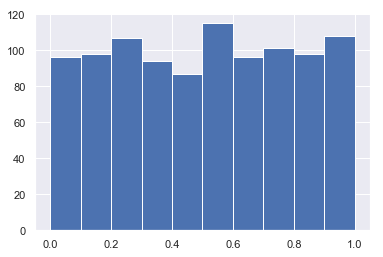

In [2]:
# Draw 1,000 samples from uniform & plot results
x = np.random.rand(1000)
plt.hist(x);

To then simulate the sampling from the population, we check whether each float was greater or less than 0.5. If less than or equal to 0.5, we say the person clicked.

In [3]:
# Computed how many people click
clicks = x <= 0.5
n_clicks = sum(clicks)
f"Number of clicks = {n_clicks}"

'Number of clicks = 482'

The proportion of people who clicked can be calculated as the total number of clicks over the number of people:

In [4]:
# Computed proportion of people who clicked
f"Proportion who clicked = {n_clicks/len(clicks)}"

'Proportion who clicked = 0.482'

**Discussion**: Did you get the same answer as your neighbour? If you did, why? If not, why not?

**Up for discussion:** Let's say that all you had was this data and you wanted to figure out the CTR (probability of clicking). 

* What would your estimate be?
* Bonus points: how confident would you be of your estimate?

**Note:** Although, in the above, we have described _probability_ in two ways, we have not described it mathematically. We're not going to do so rigorously here, but we will say that _probabilty_ defines a function from the space of possibilities (in the above, the interval $[0,1]$) that describes how likely it is to get a particular point or region in that space. Mike Betancourt has an elegant [Introduction to Probability Theory (For Scientists and Engineers)](https://betanalpha.github.io/assets/case_studies/probability_theory.html) that I can recommend.

### Hands-on: more clicking

Use random sampling to simulate how many people click when the CTR is 0.7. How many click? What proportion?

In [5]:
# Solution
x = np.random.rand(1000)

clicks = x <= 0.7
n_clicks = sum(clicks)
print(f"Number of clicks = {n_clicks}")
print(f"Proportion who clicked = {n_clicks/len(clicks)}")

Number of clicks = 689
Proportion who clicked = 0.689


_Discussion point_: This model is know as the bias coin flip. 
- Can you see why?
- Can it be used to model other phenomena?

### Galapagos finch beaks

You can also calculate such proportions with real-world data. Here we import a dataset of Finch beak measurements from the Galápagos islands. You can find the data [here](https://datadryad.org/resource/doi:10.5061/dryad.9gh90).

In [6]:
# Import and view head of data
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [7]:
# Store lengths in a pandas series
lengths = df_12['blength']

* What proportion of birds have a beak length > 10 ?

In [8]:
p = (sum(lengths > 10))/len(lengths)
p

0.8514056224899599

**Note:** This is the proportion of birds that have beak length $>10$ in your empirical data, not the probability that any bird drawn from the population will have beak length $>10$.

### A proxy for probability

As stated above, we have calculated a proportion, not a probability. As a proxy for the probability, we can simulate drawing random samples (with replacement) from the data seeing how many lengths are > 10 and calculating the proportion (commonly referred to as [hacker statistics](https://speakerdeck.com/jakevdp/statistics-for-hackers)):

In [9]:
n_samples = 10000
sum(np.random.choice(lengths, n_samples, replace=True) > 10)/n_samples

0.8505

### Another way to simulate coin-flips

In the above, you have used the uniform distribution to sample from a series of biased coin flips. I want to introduce you to another distribution that you can also use to do so: the **binomial distribution**.

The **binomial distribution** with parameters $n$ and $p$ is defined as the probability distribution of

> the number of heads seen when flipping a coin $n$ times when  with $p(heads)=p$.

**Note** that this distribution essentially tells the _story_ of a general model in the following sense: if we believe that the underlying process generating the observed data has a binary outcome (affected by disease or not, head or not, 0 or 1, clicked through or not), and that one the of the two outcomes occurs with probability $p$, then the probability of seeing a particular outcome is given by the **binomial distribution** with parameters $n$ and $p$.

We'll now use the binomial distribution to answer the same question as above:
* If P(heads) = 0.7 and you flip the coin ten times, how many heads will come up?

We'll also set the seed to ensure reproducible results.

In [10]:
# Set seed
np.random.seed(seed=16071982)

# Simulate one run of flipping the biased coin 10 times
np.random.binomial(10, 0.7)

7

### Simulating many times to get the distribution

In the above, we have simulated the scenario once. But this only tells us one potential outcome. To see how likely it is to get $n$ heads, for example, we need to simulate it a lot of times and check what proportion ended up with $n$ heads.

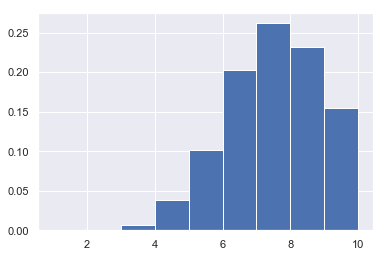

In [11]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = np.random.binomial(10, 0.7, 10000)

# Plot normalized histogram of results
plt.hist(x, density=True, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);

* Group chat: what do you see in the above?

## Hands-on

- If I flip a biased coin ($P(H)=0.3$) 20 times, what is the probability of 5 or more heads?

In [12]:
# Solution
sum(np.random.binomial(20, 0.3, 10000) >= 5)/10000

0.7613

- If I flip a fair coin 20 times, what is the probability of 5 or more heads?

In [13]:
sum(np.random.binomial(20, 0.5, 10000) >= 5)/10000

0.994

- Plot the normalized histogram of number of heads of the following experiment: flipping a fair coin 10 times.

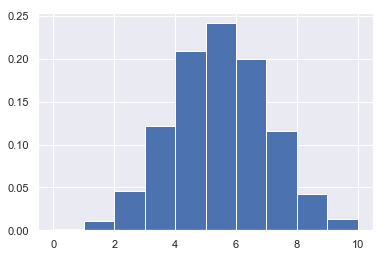

In [14]:
# Plot histogram 
x = np.random.binomial(10, 0.5, 10000)
plt.hist(x, density=True);

**Note:** you may have noticed that the _binomial distribution_ can take on only  a finite number of values, whereas the _uniform distribution_ above can take on any number between $0$ and $1$. These are different enough cases to warrant special mention of this & two different names: the former is called a _probability mass function_ (PMF) and the latter a _probability distribution function_ (PDF). Time permitting, we may discuss some of the subtleties here. If not, all good texts will cover this. I like (Sivia & Skilling, 2006), among many others.


## 3. Joint Probability & Conditional Probability

### Joint Probability

We have already encountered joint probabilities above, perhaps without knowing it: $P(A,B)$ is the probability two events $A$ and $B$ _both_ occurring.
* For example, getting two heads in a row.

If $A$ and $B$ are independent, then $P(A,B)=P(A)P(B)$ but be warned: this is not always (or often) the case.

One way to think of this is considering "AND" as multiplication: the probability of A **and** B is the probability of A **multiplied** by the probability of B.

### HANDS-ON: JOINT PROBABILITY COIN FLIPPING

Verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads) by 
- first simulating two coins being flipped together and calculating the proportion of occurences with two heads;
- then simulating one coin flip and calculating the proportion of heads and then doing that again and multiplying the two proportions.

Your two calculations should give "pretty close" results and not the same results due to the (in)accuracy of simulation. 

0.2503


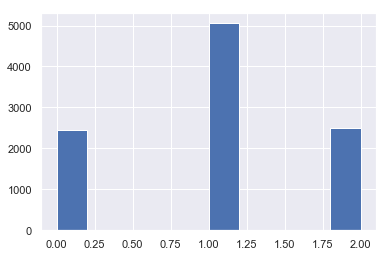

In [15]:
# Solution: Calculate P(A,B)
x_0 = np.random.binomial(2, 0.5, 10000)
p_ab = sum(x_0==2)/len(x_0)
plt.hist(x_0);
print(p_ab)

In [16]:
# Solution: Calculate P(A)P(B)
x_1 = np.random.binomial(1, 0.5, 10000)
x_2 = np.random.binomial(1, 0.5, 10000)
p_a = sum(x_1 == 1)/len(x_1)
p_b = sum(x_2 == 1)/len(x_2)
p_a*p_b

0.25024406000000005

**Note:** In order to use such simulation and _hacker statistics_ approaches to "prove" results such as the above, we're gliding over several coupled and deep technicalities. This is in the interests of the pedagogical nature of this introduction. For the sake of completeness, we'll mention that we're essentially
- Using the proportion in our simulations as a proxy for the probability (which, although Frequentist, is useful to allow you to start getting your hands dirty with probability via simluation).

Having stated this, for ease of instruction, we'll continue to do so when thinking about joint & conditional probabilities of both simulated and real data. 

### HANDS-ON: joint probability for birds

What is the probability that two randomly selected birds have beak depths over 10 ?

In [17]:
# Calculate P(A)P(B) of two birds having beak lengths > 10
p_a = (sum(lengths > 10))/len(lengths)
p_b = (sum(lengths > 10))/len(lengths)
p_a*p_b

0.724891534007516

* Calculate the joint probability using the resampling method, that is, by drawing random samples (with replacement) from the data. First calculate $P(A)P(B)$:

In [18]:
# Calculate P(A)P(B) using resampling methods
n_samples = 100000
p_a = sum(np.random.choice(lengths, n_samples, replace=True) > 10)/n_samples
p_b = sum(np.random.choice(lengths, n_samples, replace=True) > 10)/n_samples
p_a*p_b

0.7238861042000001

Now calculate $P(A,B)$:

In [19]:
# Calculate P(A,B) using resampling methods
n_samples = 100000
samples = np.random.choice(lengths, (n_samples,2), replace=True)
_ = samples > (10, 10)
p_ab = sum(np.prod(_, axis=1))/n_samples
p_ab

0.72493

**Task:** Interpret the results of your simulations.

### Conditional Probability

Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of some $A$, knowing that some other $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a finch beak having depth $<10$, knowing that the finch of of species 'fortis'?"

#### Example: conditional probability for birds

1. What is the probability of a finch beak having depth > 10 ?
2. What if we know the finch is of species 'fortis'?
3. What if we know the finch is of species 'scandens'?

In [20]:
sum(df_12.blength > 10)/len(df_12)

0.8514056224899599

In [21]:
df_fortis = df_12.loc[df_12['species'] == 'fortis']
sum(df_fortis.blength > 10)/len(df_fortis)

0.6942148760330579

In [22]:
df_scandens = df_12.loc[df_12['species'] == 'scandens']
sum(df_scandens.blength > 10)/len(df_scandens)

1.0

**Note:** These proportions are definitely different. We can't say much more currently but we'll soon see how to use hypothesis testing to see what else we can say about the differences between the species of finches.

### Joint and conditional probabilities

Conditional and joint probabilites are related by the following:
$$ P(A,B) = P(A|B)P(B)$$

**Homework exercise for the avid learner:** verify the above relationship using simulation/resampling techniques in one of the cases above.

### Hands on example: drug testing

**Question:** Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% (5 in 1,000) of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

**If we can answer this, it will be really cool as it shows how we can move from knowing $P(+|user)$ to $P(user|+)$, a MVP for being able to move from $P(data|model)$ to $P(model|data)$.**

In the spirit of this workshop, it's now time to harness your computational power and the intuition of simulation to solve this drug testing example. 

* Before doing so, what do you think the answer to the question _"What is the probability that a randomly selected individual with a positive test is a drug user?"_ is? Write down your guess.

In [23]:
# Take 10,000 subjects
n = 100000
# Sample for number of users, non-users
users = np.random.binomial(n, 0.005, 1) 
non_users = n - users

In [24]:
# How many of these users tested +ve ?
u_pos = np.random.binomial(users, 0.99)
# How many of these non-users tested +ve ?
non_pos = np.random.binomial(non_users, 0.01)

In [25]:
# how many of those +ve tests were for users?
u_pos/(u_pos+non_pos)

array([0.32798931])

**Discussion**: What you have been able to do here is to solve the following problem: you knew $P(+|user)=0.99$, but you were trying to figure out $P(user|+)$. Is the answer what you expected? If not, why not?

**Key note:** This is related to the serious scientific challenge posed at the beginning here: if you know the underlying parameters/model, you can figure out the distribution and the result, but often we have only the experimental result and we're trying to figure out the most appropriate model and parameters.

It is Bayes' Theorem that lets us move between these.

## 4. Bayes' Theorem

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

As you may have guessed, it is Bayes' Theorem that will allow us to move back and forth between $P(data|model)$ and $P(model|data)$. As we have seen, $P(model|data)$ is usually what we're interested in as data scientists yet $P(data|model)$ is what we can easily compute, either by simulating our model or using analytic equations.

**One of the coolest things:** Bayes Theorem can be proved with a few lines of mathematics. Your instructor will do this on the chalk/white-board now.

### Bayes Theorem solves the above drug testing problem

Bayes Theorem can be used to analytically derive the solution to the 'drug testing' example above as follows.

From Bayes Theorem, 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+)}$$



We can expand the denominator here into 

$$P(+)  = P(+,user) + P(+,non-user) $$

so that

$$ P(+)=P(+|user)P(user) + P(+|non-user)P(non-user)$$

and 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+|user)P(user) + P(+|non-user)P(non-user)}$$.

Calculating this explicitly yields

$$P(user|+) = \frac{0.99\times 0.005}{0.99\times 0.005 + 0.01\times 0.995} = 0.332 $$

This means that if an individual tests positive, there is still only a 33.2% chance that they are a user! This is because the number of non-users is so high compared to the number of users.

# Parameter estimation and hypothesis testing

In [26]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
from ipywidgets import interact
%matplotlib inline
sns.set()

## Learning Objectives of Part 2

1. Understand what priors, likelihoods and posteriors are;
2. Use random sampling for parameter estimation to appreciate the relationship between sample size & the posterior distribution, along with the effect of the prior;
3. Use probabilistic programming for parameter estimation;
4. Use probabilistic programming for hypothesis testing.

## 1. From Bayes Theorem to Bayesian Inference
Let's say that we flip a biased coin several times and we want to estimate the probability of heads from the number of heads we saw. Statistical intuition tells us that our best estimate of $p(heads)=$ number of heads divided by total number of flips.

However, 

1. It doesn't tell us how certain we can be of that estimate and
2. This type of intuition doesn't extend to even slightly more complex examples.

Bayesian inference helps us here. We can calculate the probability of a particular $p=p(H)$ given data $D$ by setting $A$ in Bayes Theorem equal to $p$ and $B$ equal to $D$.


$$P(p|D) = \frac{P(D|p)P(p)}{P(D)} $$



In this equation, we call $P(p)$ the prior (distribution), $P(D|p)$ the likelihood and $P(p|D)$ the posterior (distribution). The intuition behind the nomenclature is as follows: the prior is the distribution containing our knowledge about $p$ prior to the introduction of the data $D$ & the posterior is the distribution containing our knowledge about $p$ after considering the data $D$.

**Note** that we're _overloading_ the term _probability_ here. In fact, we have 3 distinct usages of the word:
- The probability $p$ of seeing a head when flipping a coin;
- The resulting binomial probability distribution $P(D|p)$ of seeing the data $D$, given $p$;
- The prior & posterior probability distributions of $p$, encoding our _uncertainty_ about the value of $p$.

**Key concept:** We only need to know the posterior distribution $P(p|D)$ up to multiplication by a constant at the moment: this is because we really only care about the values of $P(p|D)$ relative to each other – for example, what is the most likely value of $p$? To answer such questions, we only need to know what $P(p|D)$ is proportional to, as a function of $p$. Thus we don’t currently need to worry about the term $P(D)$. In fact,

$$P(p|D) \propto P(D|p)P(p) $$

**Note:** What is the prior? Really, what do we know about $p$ before we see any data? Well, as it is a probability, we know that $0\leq p \leq1$. If we haven’t flipped any coins yet, we don’t know much else: so it seems logical that all values of $p$ within this interval are equally likely, i.e., $P(p)=1$, for $0\leq p \leq1$. This is known as an uninformative prior because it contains little information (there are other uninformative priors we may use in this situation, such as the Jeffreys prior, to be discussed later). People who like to hate on Bayesian inference tend to claim that the need to choose a prior makes Bayesian methods somewhat arbitrary, but as we’ll now see, if you have enough data, the likelihood dominates over the prior and the latter doesn’t matter so much.


**Essential remark:** we get the whole distribution of $P(p|D)$, not merely a point estimate plus errors bars, such as [95% confidence intervals](http://andrewgelman.com/2018/07/04/4th-july-lets-declare-independence-95/).

## 2. Bayesian parameter estimation I: flip those coins

Now let's generate some coin flips and try to estimate $p(H)$. Two notes:
- given data $D$ consisting of $n$ coin tosses & $k$ heads, the likelihood function is given by $L:=P(D|p) \propto p^k(1-p)^k$;
- given a uniform prior, the posterior is proportional to the likelihood.


In [27]:
def plot_posterior(p=0.6, N=0):
    """Plot the posterior given a uniform prior; Bernoulli trials
    with probability p; sample size N"""
    np.random.seed(42)
    # Flip coins 
    n_successes = np.random.binomial(N, p)
    # X-axis for PDF
    x = np.linspace(0, 1, 100)
    # Prior
    prior = 1
    # Posterior
    posterior = x**n_successes*(1-x)**(N-n_successes)*prior
    posterior /= np.max(posterior)  # so that peak always at 1
    plt.plot(x, posterior)
    plt.show()

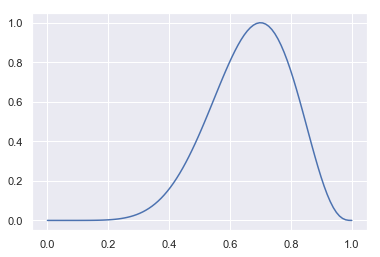

In [28]:
plot_posterior(N=10)

* Now use the great ipywidget interact to check out the posterior as you generate more and more data (you can also vary $p$):

In [29]:
interact(plot_posterior, p=(0, 1, 0.01), N=(0, 1500));

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…

**Notes for discussion:**

* as you generate more and more data, your posterior gets narrower, i.e. you get more and more certain of your estimate.
* you need more data to be certain of your estimate when $p=0.5$, as opposed to when $p=0$ or $p=1$. 

### The choice of the prior

You may have noticed that we needed to choose a prior and that, in the small to medium data limit, this choice can affect the posterior. We'll briefly introduce several types of priors and then you'll use one of them for the example above to see the effect of the prior:

- **Informative priors** express specific, definite information about a variable, for example, if we got a coin from the mint, we may use an informative prior with a peak at $p=0.5$ and small variance. 
- **Weakly informative priors** express partial information about a variable, such as a peak at $p=0.5$ (if we have no reason to believe the coin is biased), with a larger variance.
- **Uninformative priors** express no information about a variable, except what we know for sure, such as knowing that $0\leq p \leq1$.

Now you may think that the _uniform distribution_ is uninformative, however, what if I am thinking about this question in terms of the probability $p$ and Eric Ma is thinking about it in terms of the _odds ratio_ $r=\frac{p}{1-p}$? Eric rightly feels that he has no prior knowledge as to what this $r$ is and thus chooses the uniform prior on $r$.

With a bit of algebra (transformation of variables), we can show that choosing the uniform prior on $p$ amounts to choosing a decidedly non-uniform prior on $r$ and vice versa. So Eric and I have actually chosen different priors, using the same philosophy. How do we avoid this happening? Enter the **Jeffreys prior**, which is an uninformative prior that solves this problem. You can read more about the Jeffreys prior [here](https://en.wikipedia.org/wiki/Jeffreys_prior) & in your favourite Bayesian text book (Sivia gives a nice treatment). 

In the binomial (coin flip) case, the Jeffreys prior is given by $P(p) = \frac{1}{\sqrt{p(1-p)}}$.

#### Hands-on

* Create an interactive plot like the one above, except that it has two posteriors on it: one for the uniform prior, another for the Jeffries prior.

In [30]:
# Solution
def plot_posteriors(p=0.6, N=0):
    np.random.seed(42)
    n_successes = np.random.binomial(N, p)
    x = np.linspace(0.01, 0.99, 100)
    posterior1 = x**n_successes*(1-x)**(N-n_successes)  # w/ uniform prior
    posterior1 /= np.max(posterior1)  # so that peak always at 1
    plt.plot(x, posterior1, label='Uniform prior')
    jp = np.sqrt(x*(1-x))**(-1)  # Jeffreys prior
    posterior2 = posterior1*jp  # w/ Jeffreys prior
    posterior2 /= np.max(posterior2)  # so that peak always at 1 (not quite correct to do; see below)
    plt.plot(x, posterior2, label='Jeffreys prior')
    plt.legend()
    plt.show()

In [31]:
interact(plot_posteriors, p=(0, 1, 0.01), N=(0, 100));

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…

**Question:** What happens to the posteriors as you generate more and more data?

## 3. Bayesian parameter estimation using PyMC3

Well done! You've learnt the basics of Bayesian model building. The steps are
1. To completely specify the model in terms of _probability distributions_. This includes specifying 
    - what the form of the sampling distribution of the data is _and_ 
    - what form describes our _uncertainty_ in the unknown parameters (This formulation is adapted from [Fonnesbeck's workshop](https://github.com/fonnesbeck/intro_stat_modeling_2017/blob/master/notebooks/2.%20Basic%20Bayesian%20Inference.ipynb) as Chris said it so well there).
2. Calculate the _posterior distribution_.

In the above, the form of the sampling distribution of the data was Binomial (described by the likelihood) and the uncertainty around the unknown parameter $p$ captured by the prior.

Now it is time to do the same using the **probabilistic programming language** PyMC3. There's _loads_ about PyMC3 and this paradigm, two of which are
- _probabililty distributions_ are first class citizens, in that we can assign them to variables and use them intuitively to mirror how we think about priors, likelihoods & posteriors.
- PyMC3 calculates the posterior for us!

Under the hood, PyMC3 will compute the posterior using a sampling based approach called Markov Chain Monte Carlo (MCMC) or Variational Inference. Check the [PyMC3 docs](https://docs.pymc.io/) for more on these. 

But now, it's time to bust out some MCMC and get sampling!

### Parameter estimation I: click-through rate

A common experiment in tech data science is to test a product change and see how it affects a metric that you're interested in. Say that I don't think enough people are clicking a button on my website & I hypothesize that it's because the button is a similar color to the background of the page. Then I can set up two pages and send some people to each: the first the original page, the second a page that is identical, except that it has a button that is of higher contrast and see if more people click through. This is commonly referred to as an A/B test and the metric of interest is click-through rate (CTR), what proportion of people click through. Before even looking at two rates, let's use PyMC3 to estimate one.

First generate click-through data, given a CTR $p_a=0.15$.

In [32]:
# click-through rates
p_a = 0.15
N = 150
n_successes_a = np.sum(np.random.binomial(N, p_a))
#n_successes_a = np.random.binomial(N, p_a)

Now it's time to build your probability model. Noticing that our model of having a constant CTR resulting in click or not is a biased coin flip,
- the sampling distribution is binomial and we need to encode this in the likelihood;
- there is a single parameter $p$ that we need to describe the uncertainty around, using a prior and we'll use a uniform prior for this.

These are the ingredients for the model so let's now build it:

In [33]:
# Build model of p_a
with pm.Model() as Model:
    # Prior on p
    prob = pm.Uniform('p')
    # Binomial Likelihood
    y = pm.Binomial('y', n=N, p=prob, observed=n_successes_a)

**Discussion:** 
- What do you think of the API for PyMC3. Does it reflect how we think about model building?

It's now time to sample from the posterior using PyMC3. You'll also plot the posterior:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p_interval__]
100%|██████████| 2500/2500 [00:01<00:00, 1624.43it/s]


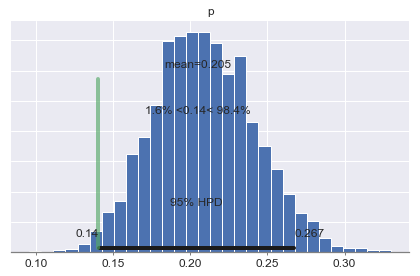

In [34]:
with Model:
    samples = pm.sample(2000, njobs=1)

pm.plot_posterior(samples, ref_val=0.14);

**For discussion:** Interpret the posterior ditribution. What would your tell the non-technical manager of your growth team about the CTR?

### Hands-on: Parameter estimation II -- the mean of a population

In this exercise, you'll calculate the  posterior mean beak depth of Galapagos finches in a given species. First you'll load the data and subset wrt species:

In [35]:
# Import and view head of data
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_fortis = df_12.loc[df_12['species'] == 'fortis']
df_scandens = df_12.loc[df_12['species'] == 'scandens']

To specify the full probabilty model, you need
- a likelihood function for the data &
- priors for all unknowns.

What is the likelihood here? Let's plot the measurements below and see that they look approximately Gaussian/normal so you'll use a normal likelihood $y_i\sim \mathcal{N}(\mu, \sigma^2)$. The unknowns here are the mean $\mu$ and standard deviation $\sigma$ and we'll use weakly informative priors on both
- a normal prior for $\mu$ with mean $10$ and standard deviation $5$;
- a uniform prior for $\sigma$ bounded between $0$ and $10$.

We can discuss biological reasons for these priors also but you can also test that the posteriors are relativelyt robust to the choice of prior here due to the amount of data.

In [36]:
df_fortis['blength'].describe()

count    121.000000
mean      10.517355
std        0.807741
min        9.000000
25%       10.000000
50%       10.400000
75%       10.900000
max       12.900000
Name: blength, dtype: float64

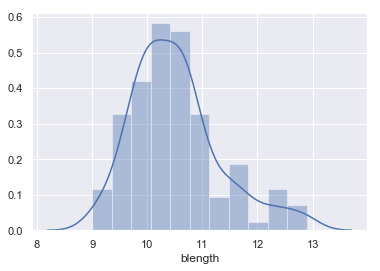

In [37]:
sns.distplot(df_fortis['blength']);

In [38]:
with pm.Model() as model:
    # Prior for mean & standard deviation
    μ_1 = pm.Normal('μ_1', mu=10, sd=5)
    σ_1 = pm.Lognormal('σ_1', 0, 10)
    # Gaussian Likelihood
    y_1 = pm.Normal('y_1', mu=μ_1, sd=σ_1, observed=df_fortis['blength'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ_1_log__, μ_1]
100%|██████████| 2500/2500 [00:01<00:00, 1332.95it/s]


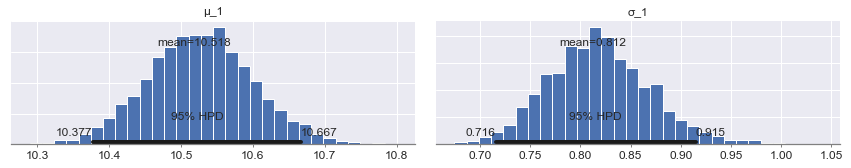

In [39]:
# bust it out & sample
with model:
    samples = pm.sample(2000, njobs=1)
    
pm.plot_posterior(samples);

## 4. Bayesian Hypothesis testing

### Bayesian Hypothesis testing I: A/B tests on click through rates

Assume we have a website and want to redesign the layout ($A$) and test whether the new layout ($B$) results in a higher click through rate. When people come to our website we randomly show them layout $A$ or $B$ and see how many people click through for each. First let's generate the data we need:

In [47]:
# click-through rates
p_a = 0.15
p_b = 0.20
N = 1000
n_successes_a = np.sum(np.random.uniform(size=N) <= p_a)
n_successes_b = np.sum(np.random.uniform(size=N) <= p_b)

Once again, we need to specify our models for $p_a$ and $p_b$. Each will be the same as the CTR example above
- Binomial likelihoods
- uniform priors on $p_a$ and $p_b$.

We also want to calculate the posterior of the difference $p_a-p_b$ and we do so using `pm.Deterministic()`, which specifies a deterministic random variable, i.e., one that is completely determined by the values it references, in the case $p_a$ & $p_b$.

We'll now build the model:

In [50]:
with pm.Model() as Model:
    # Prior on p
    prob_a = pm.Uniform('p_a')
    prob_b = pm.Uniform('p_b')
    # Binomial Likelihood
    y_a = pm.Binomial('y_a', n=N, p=prob_a, observed=n_successes_a)
    y_b = pm.Binomial('y_b', n=N, p=prob_b, observed=n_successes_b)
    diff_clicks = pm.Deterministic('diff_clicks', prob_a-prob_b)

Sample from the posterior and plot them:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p_b_interval__, p_a_interval__]
100%|██████████| 2500/2500 [00:01<00:00, 1367.92it/s]


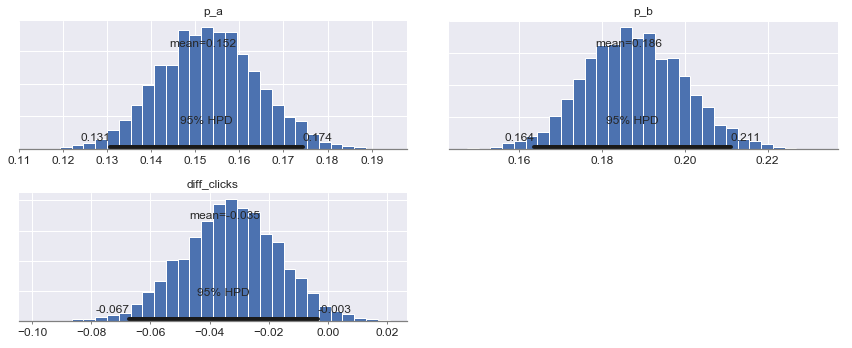

In [51]:
with Model:
    samples = pm.sample(2000, njobs=1)
pm.plot_posterior(samples);

### Hands-on: Bayesian Hypothesis testing II -- beak lengths difference between species

**Task**: Determine whether the mean beak length of the Galapogas finches differs between species. For the mean of each species, use the same model as in previous hand-on section:

- Gaussian likelihood;
- Normal prior for the means;
- Uniform prior for the variances.

Also calculate the difference between the means and, for bonus points, the _effect size_, which is the difference between the means divided by the pooled standard deviations = $\sqrt{(\sigma_1^2+\sigma_2^2)/2}$. Hugo will talk through the importance of the _effect size_.

Don't forget to sample from the posteriors and plot them!

In [43]:
with pm.Model() as model:
    # Priors for means and variances
    μ_1 = pm.Normal('μ_1', mu=10, sd=5)
    σ_1 = pm.Uniform('σ_1', 0, 10)
    μ_2 = pm.Normal('μ_2', mu=10, sd=5)
    σ_2 = pm.Uniform('σ_2', 0, 10)
    # Gaussian Likelihoods
    y_1 = pm.Normal('y_1', mu=μ_1, sd=σ_1, observed=df_fortis['blength'])
    y_2 = pm.Normal('y_2', mu=μ_2, sd=σ_2, observed=df_scandens['blength'])
    # Calculate the effect size and its uncertainty.
    diff_means = pm.Deterministic('diff_means', μ_1 - μ_2)
    pooled_sd = pm.Deterministic('pooled_sd', 
                                 np.sqrt(np.power(σ_1, 2) + 
                                         np.power(σ_2, 2)) / 2)
    effect_size = pm.Deterministic('effect_size', 
                                   diff_means / pooled_sd)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ_2_interval__, μ_2, σ_1_interval__, μ_1]
100%|██████████| 2500/2500 [00:02<00:00, 842.99it/s]


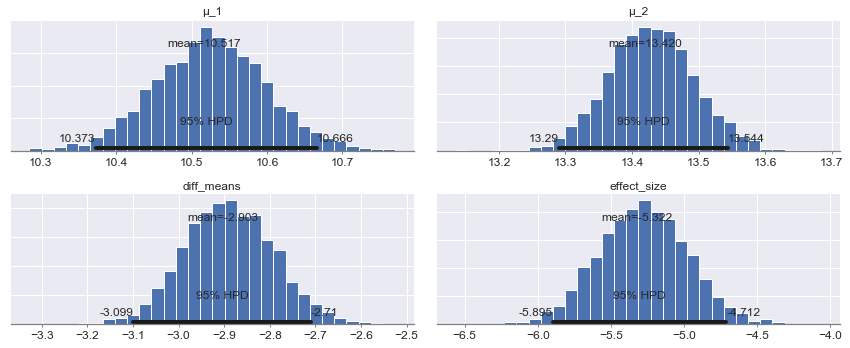

In [44]:
# bust it out & sample
with model:
    samples = pm.sample(2000, njobs=1)
pm.plot_posterior(samples, varnames=['μ_1', 'μ_2', 'diff_means', 'effect_size']);